In [1]:
# Install the libsndfile library
!apt-get update
!apt-get install -y libsndfile1

# Install librosa using pip
!pip install librosa

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]
Get:2 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1225 B]
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [1616 B]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1214 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [3711 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [3651 kB]
Hit:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Get:10 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [3053 kB]
Get:11 https://packages.cloud.google.com/apt cloud-sdk/main all Packages [1464 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1512 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd6

In [2]:
# Update pip to the latest version
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2


In [3]:
!apt-get update
!apt-get install -y libsndfile1

# Install librosa using pip
!pip install librosa

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 https://packages.cloud.google.com/apt gcsfuse-focal InRelease
Hit:5 https://packages.cloud.google.com/apt cloud-sdk InRelease
Hit:6 http://security.ubuntu.com/ubuntu focal-security InRelease




libsndfile1 is already the newest version (1.0.28-7ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 71 not upgraded.


In [4]:
!pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver

In [5]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
# Manual np_utils functionalities
import numpy as np

def np_utils(y, num_classes=None):
    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes))
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

In [7]:
# Paths for data.
Crema = "/kaggle/input/cremad/AudioWAV/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [8]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


In [9]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
1,fear,/kaggle/input/surrey-audiovisual-expressed-emo...
2,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...


In [10]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Crema_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


In [11]:
audio_file = '/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav' # Replace with actual file paths

print("Sampling Rate : "+ str(librosa.get_samplerate(audio_file))+"Hz")
print("Duration : "+ str(librosa.get_duration(filename=audio_file))+"s")

# import the audio files
signal, sampling_rate = librosa.load(audio_file, sr=44100, mono=False)
# Shape of features
print("Shape of Initial Data : "+ str(signal.shape))

Sampling Rate : 16000Hz
Duration : 2.43575s
Shape of Initial Data : (107417,)


In [12]:
print(signal.shape)# Initially the signal is in stereo form (2 channels)
audio_mono = librosa.to_mono(signal)
print(audio_mono.shape) # Mono signal

(107417,)
(107417,)


In [13]:
# Original Sampling Rate is 44 kHz
print("Original Sampling Rate : "+str(sampling_rate)+" Hz")
# Downsample to 22 kHz
signal_22k = librosa.resample(audio_mono, orig_sr=sampling_rate, target_sr=22050)
# Upsample to 88 kHz
signal_88k = librosa.resample(audio_mono, orig_sr=sampling_rate, target_sr=88200)
print(signal_22k.shape)
print(signal_88k.shape)

Original Sampling Rate : 44100 Hz
(53709,)
(214834,)


# EDA

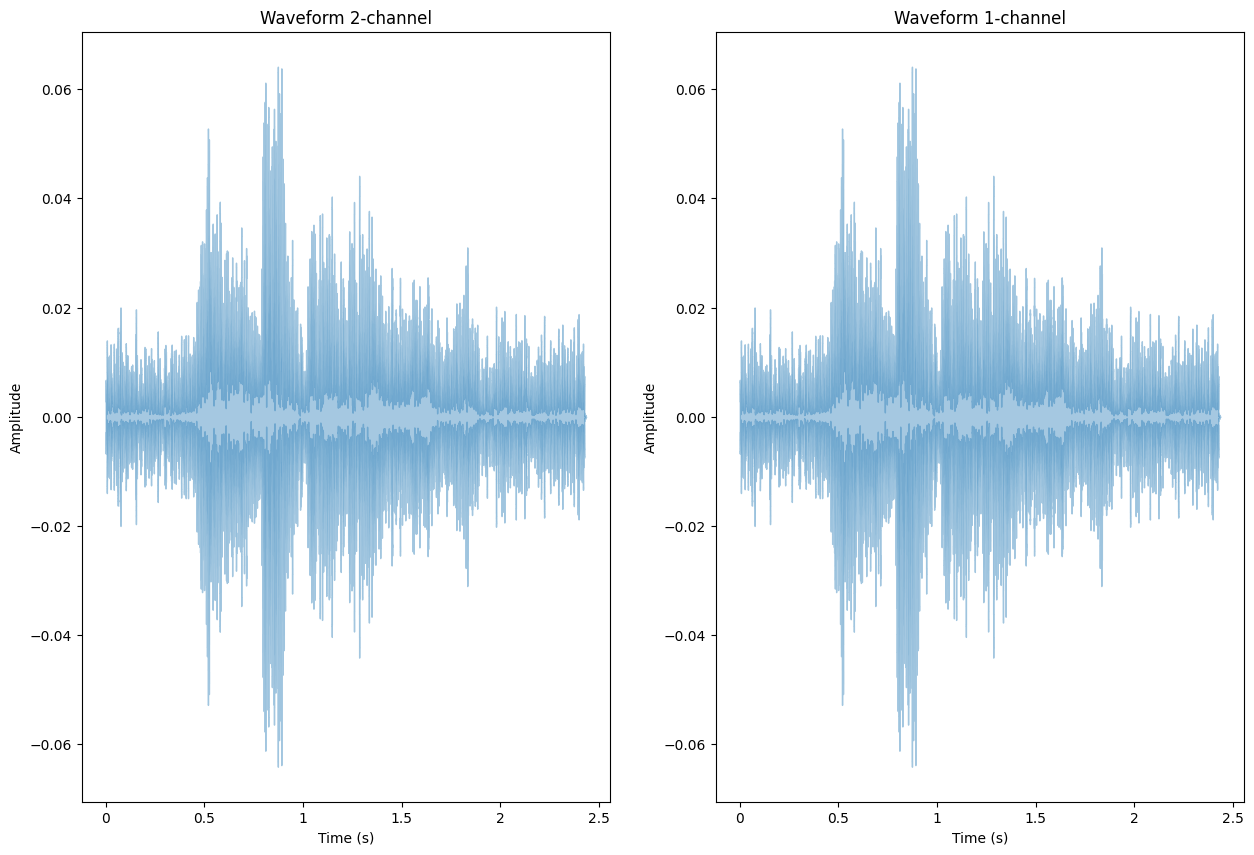

In [14]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Assuming signal and sampling_rate are already defined
# and signal is the stereo version of the signal

# Convert to mono if not already done
audio_mono = librosa.to_mono(signal)

FIG_SIZE = (15, 10)
plt.figure(figsize=FIG_SIZE)

# Plot the stereo signal
plt.subplot(1, 2, 1)
librosa.display.waveshow(signal, sr=sampling_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform 2-channel")

# Plot the mono signal
plt.subplot(1, 2, 2)
librosa.display.waveshow(audio_mono, sr=sampling_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform 1-channel")

plt.show()

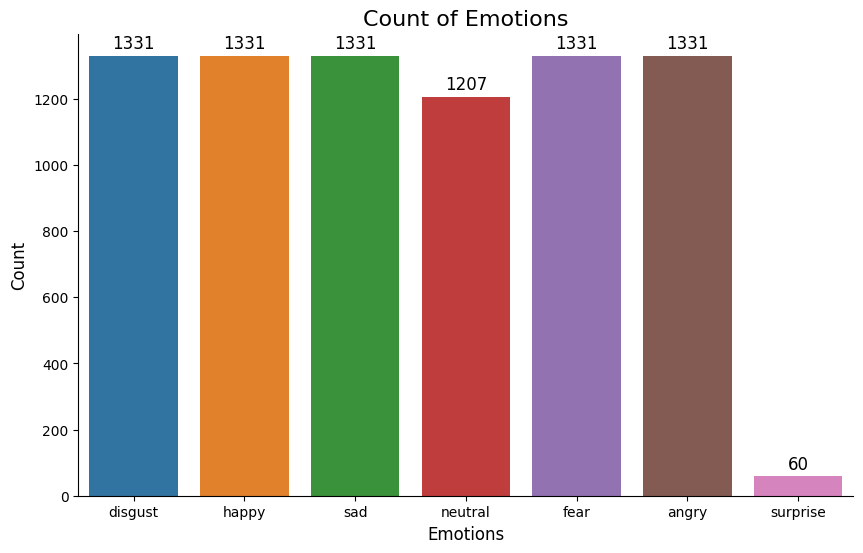

In [15]:
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)
count_plot = sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

# Annotate the bars with the count values
for p in count_plot.patches:
    count = int(p.get_height())
    count_plot.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.show()

In [16]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

**Fear**

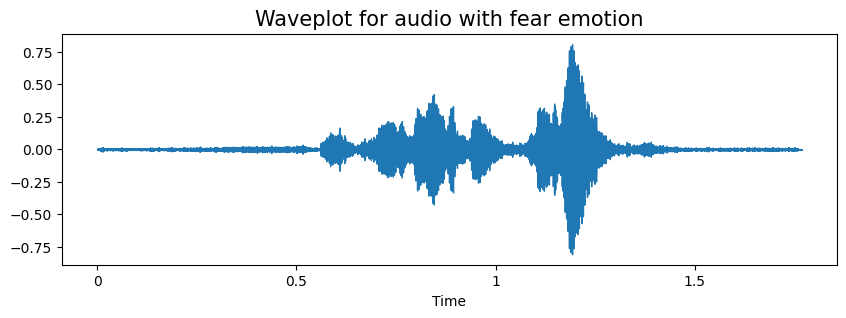

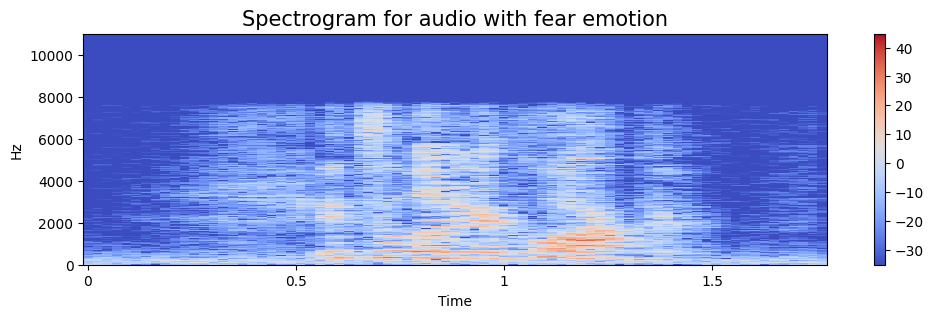

In [17]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

**Angry**

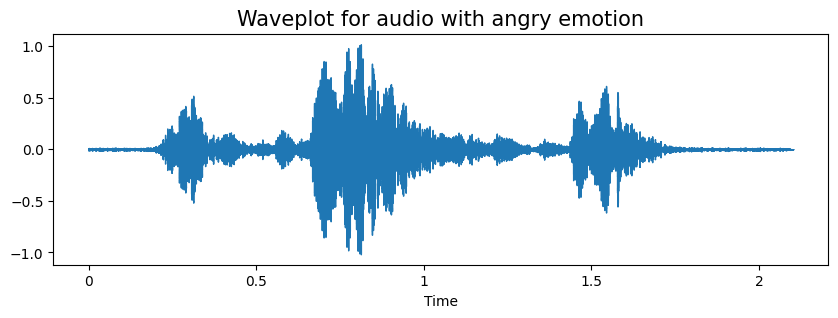

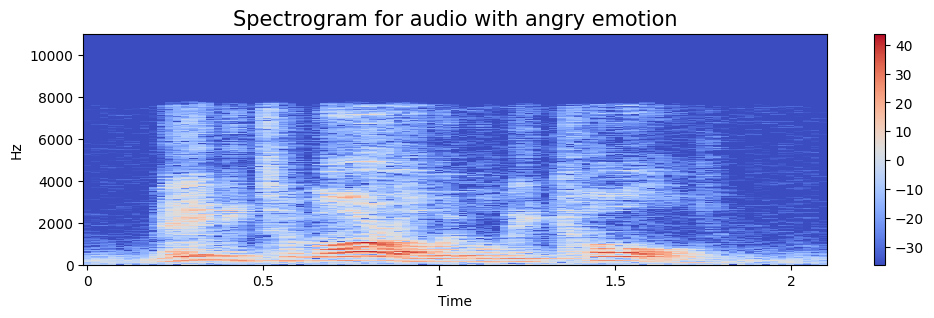

In [18]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

**Sad**

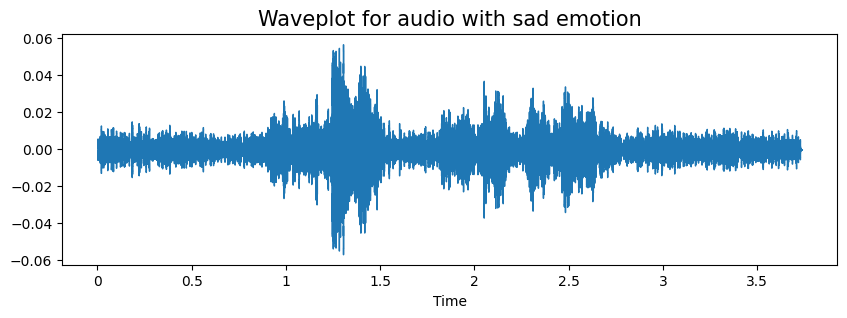

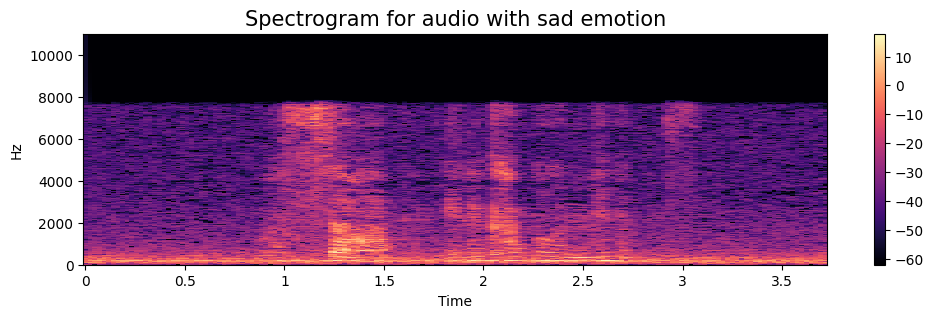

In [19]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

**Happy**

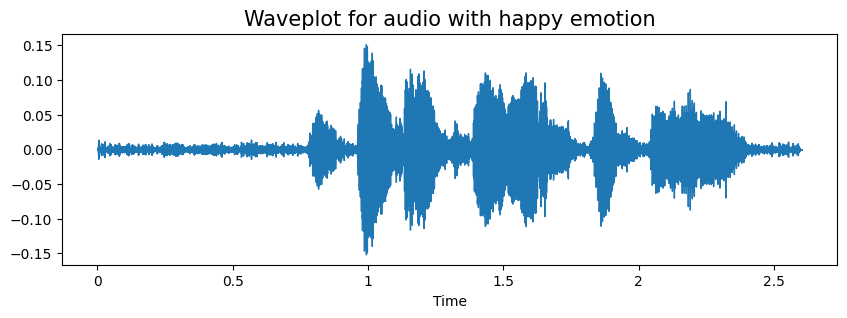

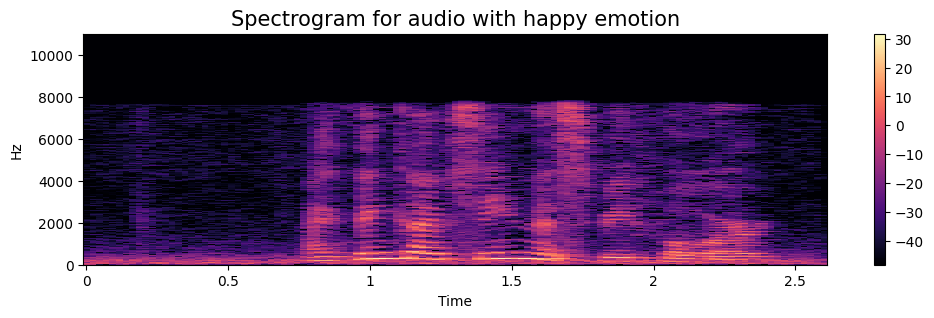

In [20]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

**Disgust**

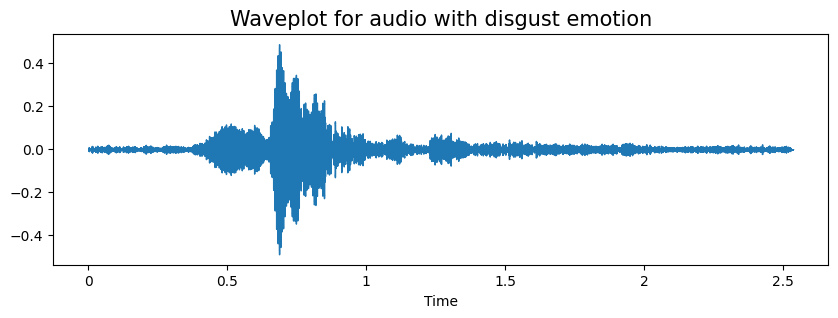

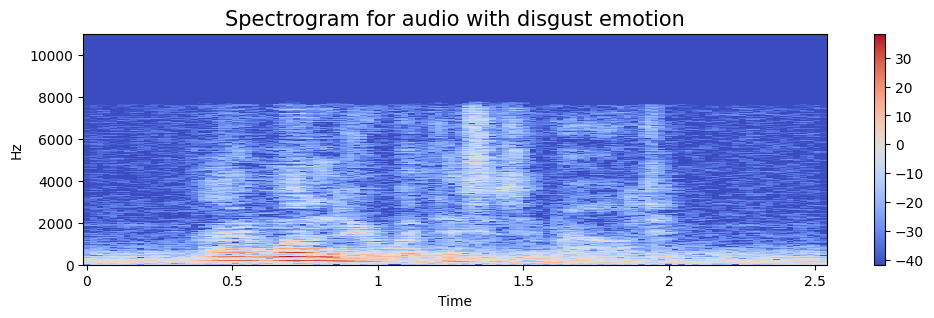

In [21]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

**Neutral**

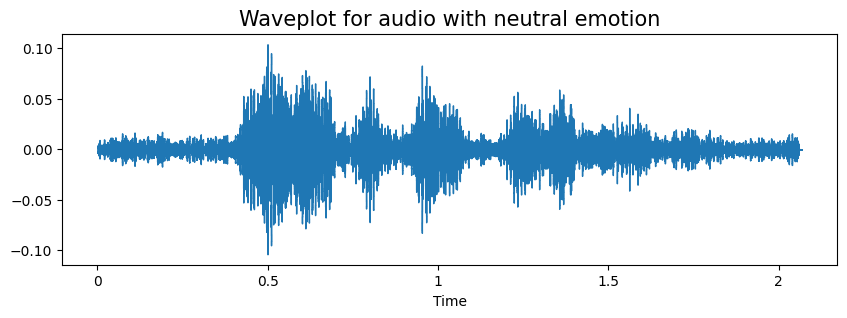

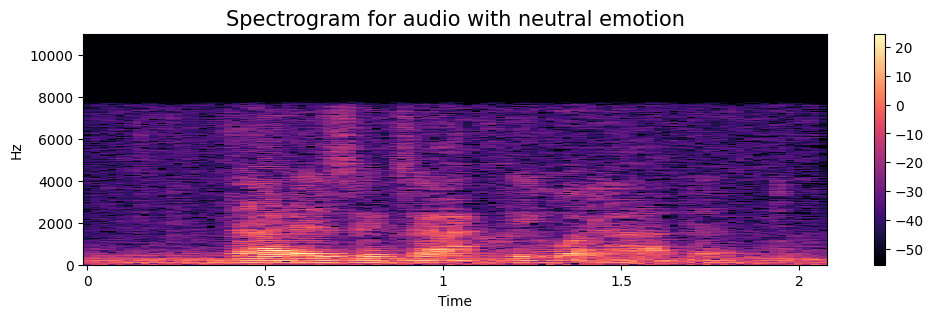

In [22]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

**Suprise**

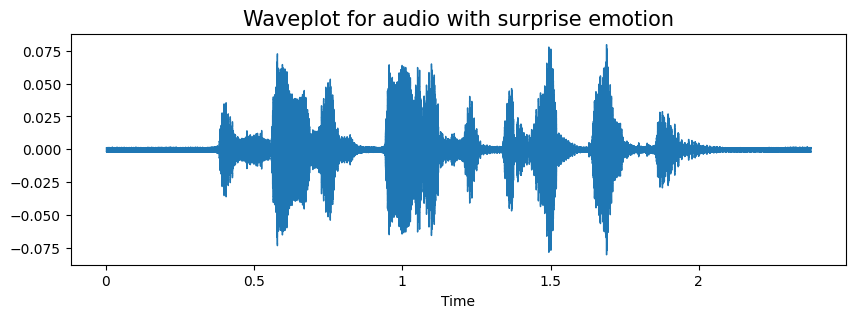

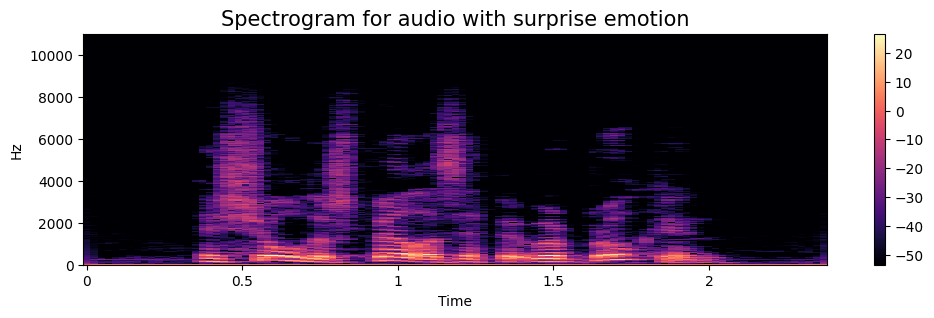

In [23]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#  Audio Augmentation

In [24]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    D = librosa.stft(data)
    # Stretch using phase vocoder
    stretched = librosa.phase_vocoder(D, rate=rate)
    # Inverse STFT to get the stretched audio signal
    stretched_audio = librosa.istft(stretched)
    return stretched_audio

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    data_stretched = stretch(data, rate=pitch_factor)
    return data_stretched

# Taking any example and checking for techniques
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

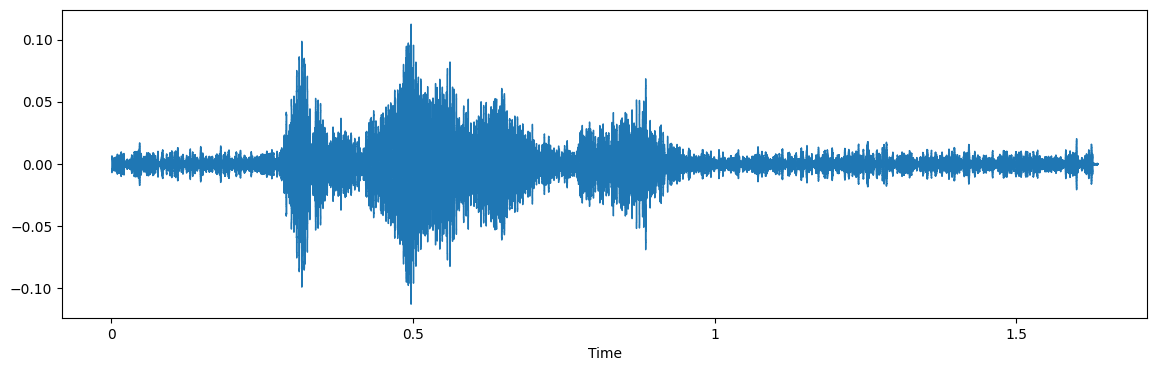

In [25]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

**Noise Interjection**

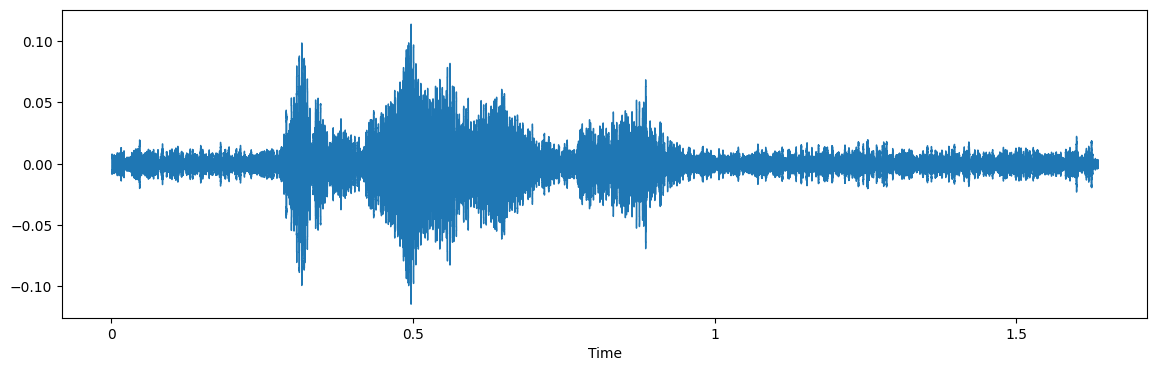

In [26]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**Stretching**

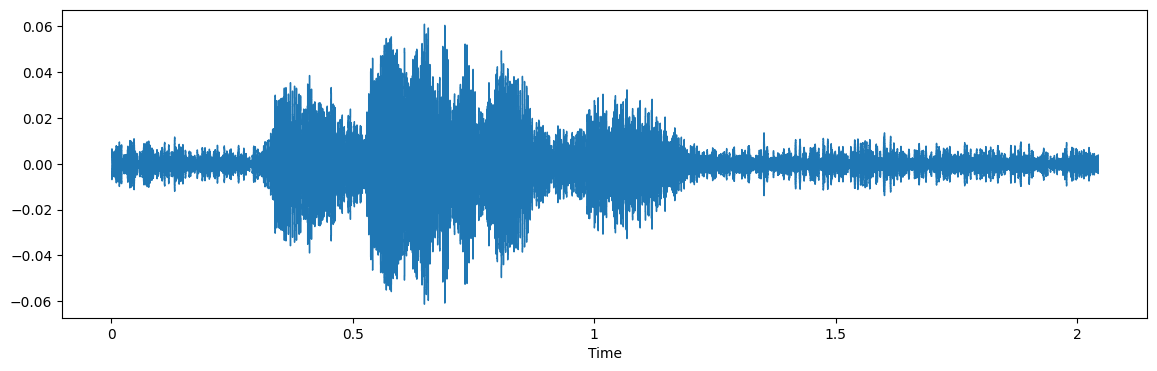

In [27]:
x = stretch(data)

# Plotting the stretched waveform using waveshow
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)

# Playing the stretched audio
Audio(x, rate=sample_rate)

**Shifting**

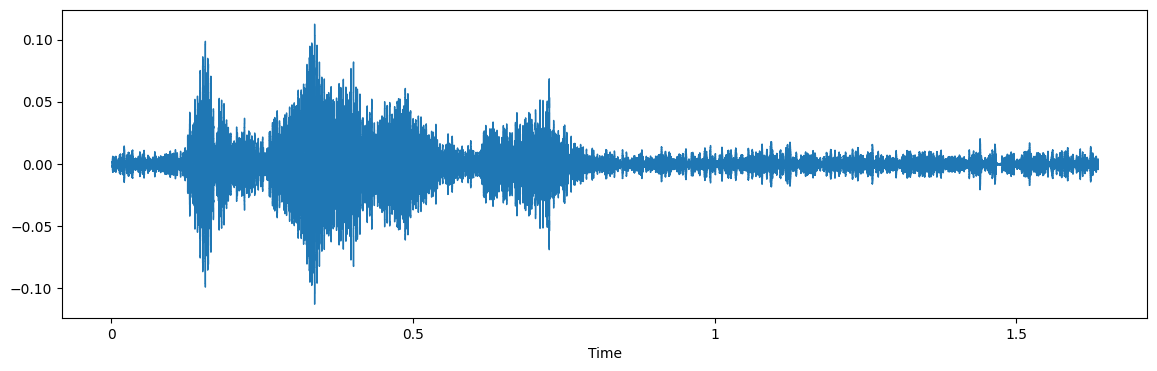

In [28]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**Pitching**

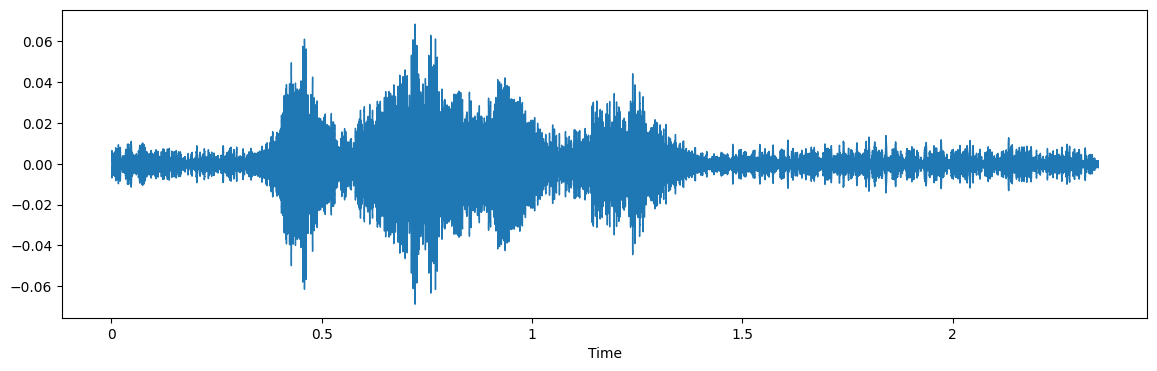

In [29]:
x = pitch(data, sample_rate, pitch_factor=0.7)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Feature Extraction

In [30]:
def extract_features(data, sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result

def get_features(path, emotion=None):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = [(res1, emotion)]

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result.append((res2, emotion))

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result.append((res3, emotion))

    shifted_data = shift(data)
    res4 = extract_features(shifted_data, sample_rate)
    result.append((res4, emotion))

    return result

In [31]:
from joblib import Parallel, delayed

In [32]:
def process_file(path, emotion):
    features = get_features(path, emotion)
    return features

# Use joblib to parallelize the process
result = Parallel(n_jobs=-1)(delayed(process_file)(path, emotion) for path, emotion in zip(data_path.Path, data_path.Emotions))

# Flatten the results and separate X and Y
X, Y = zip(*[item for sublist in result for item in sublist])

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

/opt/conda/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [33]:
len(X), len(Y), data_path.Path.shape

(31688, 31688, (7922,))

In [34]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.104980,0.563401,0.612247,0.638626,0.649128,0.678441,0.707500,0.625822,0.653229,0.708267,...,2.152814e-08,2.013419e-08,1.913250e-08,1.838317e-08,1.782696e-08,1.743269e-08,1.714886e-08,1.696939e-08,1.685791e-08,disgust
1,0.130865,0.634188,0.671878,0.701910,0.713037,0.741880,0.752290,0.644936,0.665887,0.715768,...,8.426977e-05,8.894639e-05,9.275624e-05,8.806780e-05,8.760356e-05,8.545217e-05,9.118116e-05,8.477722e-05,8.440752e-05,disgust
2,0.113472,0.528656,0.552524,0.596798,0.634852,0.687244,0.726579,0.618441,0.609665,0.677435,...,1.415395e-08,1.316582e-08,1.245205e-08,1.194707e-08,1.156695e-08,1.131547e-08,1.110076e-08,1.096985e-08,1.092342e-08,disgust
3,0.105981,0.574384,0.610059,0.641970,0.652182,0.679029,0.715682,0.630233,0.658572,0.708248,...,9.821147e-08,9.536975e-08,9.311649e-08,9.119824e-08,8.960150e-08,8.836911e-08,8.738818e-08,8.673214e-08,8.628977e-08,disgust
4,0.040972,0.621293,0.632687,0.567497,0.561870,0.628710,0.706746,0.717436,0.700302,0.680370,...,1.213368e-07,1.138015e-07,1.084594e-07,1.044757e-07,1.015138e-07,9.940926e-08,9.788443e-08,9.691804e-08,9.631243e-08,happy


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from collections import Counter
from sklearn.decomposition import PCA
import pandas as pd

# Assuming X and Y are your features and labels respectively
# Check the unique classes and their counts in Y
unique_classes = np.unique(Y)
print("Unique classes in Y:", unique_classes)
print("Number of unique classes:", len(unique_classes))

# Check the distribution of classes
class_distribution = Counter(Y)
print("Class distribution:", class_distribution)

# Proceed with data splitting
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Verify the unique classes in the train and test splits
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))

# Scaling data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Making data compatible with model
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# One-hot encoding the target data
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

print("Shape of y_train after one-hot encoding:", y_train.shape)
print("Shape of y_test after one-hot encoding:", y_test.shape)

# Check the number of classes
num_classes = y_train.shape[1]
print("Number of classes:", num_classes)

# Save features to a CSV file
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

# Apply PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # Choose the number of components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Check the number of components after PCA
print("Number of components after PCA:", X_pca.shape[1])

# Split the data into train and test sets
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.2, random_state=128)

Unique classes in Y: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Number of unique classes: 7
Class distribution: Counter({'disgust': 5324, 'happy': 5324, 'sad': 5324, 'fear': 5324, 'angry': 5324, 'neutral': 4828, 'surprise': 240})
Unique classes in y_train: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Unique classes in y_test: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Shape of y_train after one-hot encoding: (23766, 7)
Shape of y_test after one-hot encoding: (7922, 7)
Number of classes: 7
Number of components after PCA: 74


In [36]:
print("Shape of y_train_pca:", y_train_pca.shape)

Shape of y_train_pca: (25350,)


In [37]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Create the LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train_pca)

# Transform the test labels
y_test_encoded = label_encoder.transform(y_test_pca)

# Get the number of classes
num_classes = len(label_encoder.classes_)

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes)

In [38]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_pca, y_train_encoded)
y_train_resampled_one_hot = tf.keras.utils.to_categorical(y_train_resampled, num_classes)

# Reshape data for LSTM input
x_train_resampled_reshaped = np.reshape(x_train_resampled, (x_train_resampled.shape[0], 1, x_train_resampled.shape[1]))
x_test_pca_reshaped = np.reshape(x_test_pca, (x_test_pca.shape[0], 1, x_test_pca.shape[1]))


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Model 1 <-> Bi-LSTM

In [40]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
# Create the model
model1 = Sequential()
model1.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, x_train_pca.shape[1])))
model1.add(Dropout(0.2))
model1.add(Bidirectional(LSTM(64)))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history1 = model1.fit(x_train_resampled_reshaped, y_train_resampled_one_hot,
                    validation_data=(x_test_pca_reshaped, y_test_one_hot),
                    epochs=150, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model1.evaluate(x_test_pca_reshaped, y_test_one_hot)
print("Test Accuracy:", accuracy)

# Generate predictions
y_pred_prob = model1.predict(x_test_pca_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Print model summary
print(model1.summary())

Epoch 1/150
941/941 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4484 - loss: 1.3892 - val_accuracy: 0.4757 - val_loss: 1.3046
Epoch 2/150
941/941 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5487 - loss: 1.1225 - val_accuracy: 0.5036 - val_loss: 1.2500
Epoch 3/150
941/941 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5807 - loss: 1.0506 - val_accuracy: 0.5278 - val_loss: 1.1998
Epoch 4/150
941/941 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5988 - loss: 1.0079 - val_accuracy: 0.5341 - val_loss: 1.1801
Epoch 5/150
941/941 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6178 - loss: 0.9572 - val_accuracy: 0.5508 - val_loss: 1.1326
Epoch 6/150
941/941 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6369 - loss: 0.9198 - val_accuracy: 0.5713 - val_loss: 1.0931
Epoch 7/150
941/941 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6543 - loss: 0.8771 - val_accuracy: 0.5869 - val_loss: 1.0602
Epoch 8/150
941/941 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6681 - loss: 0.8454 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │       207,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,168,919 (4.46 MB)

 Trainable params: 389,639 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 779,280 (2.97 MB)

None


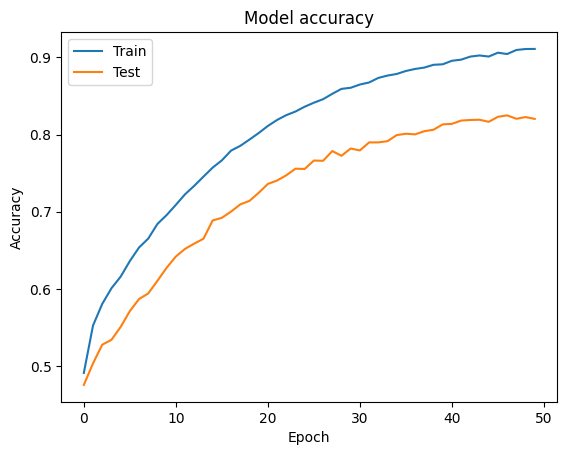

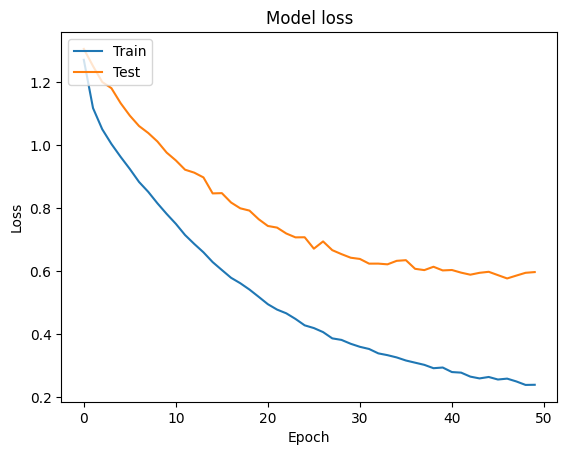

In [41]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


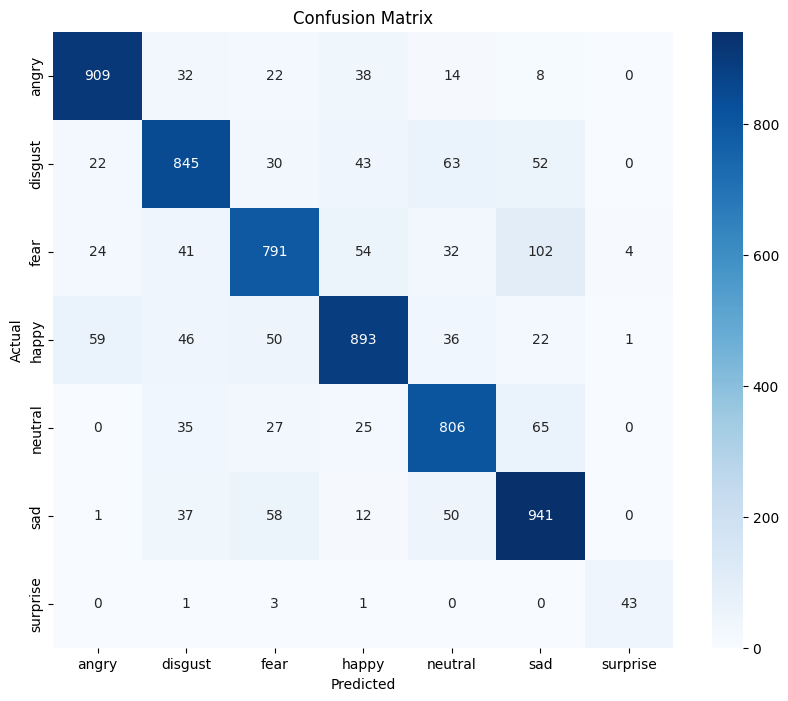

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict probabilities for each class
y_pred_probs = model1.predict(x_test_pca_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

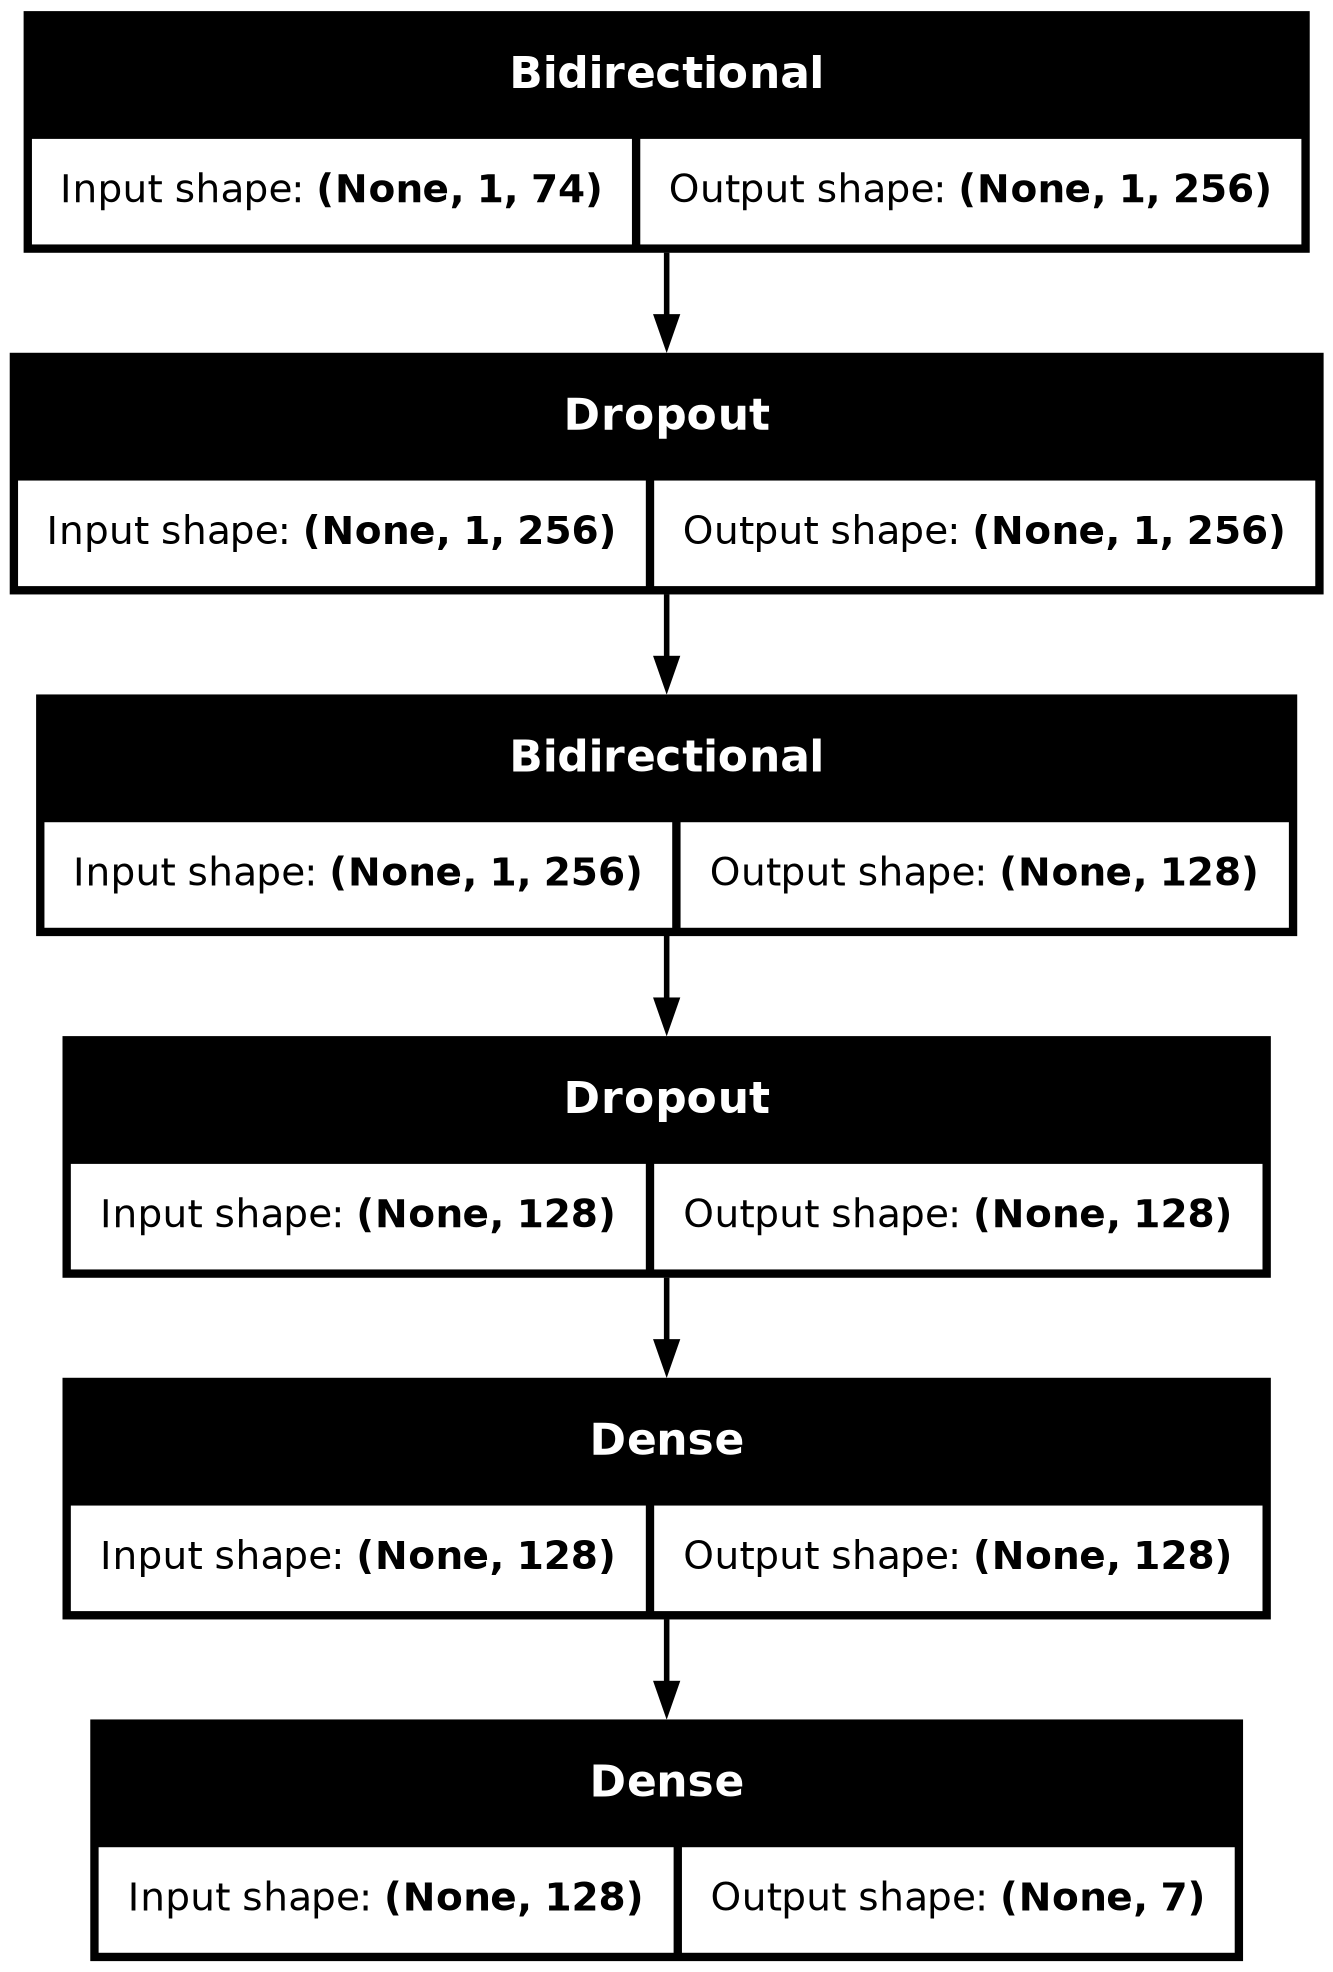

In [43]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model1, to_file='model_1_architecture.png', show_shapes=True)

In [44]:
x_train_pca_reshaped = x_train_pca.reshape(x_train_pca.shape[0], x_train_pca.shape[1], 1)
print("Shape of x_train_pca_reshaped:", x_train_pca_reshaped.shape)

Shape of x_train_pca_reshaped: (25350, 74, 1)


# Model 2 <-> CNN-LSTM

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape, LSTM, Dropout, Dense
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

x_train_pca_reshaped = x_train_pca.reshape(x_train_pca.shape[0], x_train_pca.shape[1], 1)
x_test_pca_reshaped = x_test_pca.reshape(x_test_pca.shape[0], x_test_pca.shape[1], 1)

print("Shape of x_train_pca_reshaped:", x_train_pca_reshaped.shape)
print("Shape of y_train_resampled_one_hot:", y_train_resampled_one_hot.shape)
print("Shape of x_test_pca_reshaped:", x_test_pca_reshaped.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

model2 = Sequential()

# Add convolutional layers
model2.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(x_train_pca_reshaped.shape[1], x_train_pca_reshaped.shape[2])))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(64, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(128, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

# Flatten the output for the recurrent layer
model2.add(Flatten())

# Reshape the output to include the time step dimension
model2.add(Reshape((-1, model2.output_shape[-1])))

# Add LSTM layers
model2.add(LSTM(128, return_sequences=True))
model2.add(Dropout(0.5))  # Add dropout for regularization
model2.add(LSTM(64))
model2.add(Dropout(0.5))  # Add dropout for regularization

# Add Dense layers
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history2 = model2.fit(x_train_pca_reshaped[:25350], y_train_resampled_one_hot[:25350],
                     validation_data=(x_test_pca_reshaped, y_test_one_hot),
                     epochs=150, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model2.evaluate(x_test_pca_reshaped, y_test_one_hot)
print("Test Accuracy:", accuracy)

# Generate predictions
y_pred_prob = model2.predict(x_test_pca_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
print(classification_report(np.argmax(y_test_one_hot, axis=1), y_pred, target_names=label_encoder.classes_))

# Print model summary
print(model2.summary())


Shape of x_train_pca_reshaped: (25350, 74, 1)
Shape of y_train_resampled_one_hot: (30107, 7)
Shape of x_test_pca_reshaped: (6338, 74, 1)
Shape of y_test_one_hot: (6338, 7)
Epoch 1/150
793/793 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.2640 - loss: 1.7232 - val_accuracy: 0.3758 - val_loss: 1.5041
Epoch 2/150
793/793 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.3805 - loss: 1.5084 - val_accuracy: 0.4214 - val_loss: 1.4270
Epoch 3/150
793/793 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.4175 - loss: 1.4269 - val_accuracy: 0.4498 - val_loss: 1.3610
Epoch 4/150
793/793 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.4504 - loss: 1.3636 - val_accuracy: 0.4733 - val_loss: 1.3179
Epoch 5/150
793/793 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.4720 - loss: 1.3040 - val_accuracy: 0.4916 - val_loss: 1.2735
Epoch 6/150
793/793 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5165 - loss: 1.2278 - val_accuracy: 0.4920 - val_loss: 1.2591
Epoch 7/150
793/793 ━━━━━━━━━━━━━━━━━━━━ 1

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 72, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 34, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 17, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 15, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 128)         │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,899,863 (7.25 MB)

 Trainable params: 633,287 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,266,576 (4.83 MB)

None


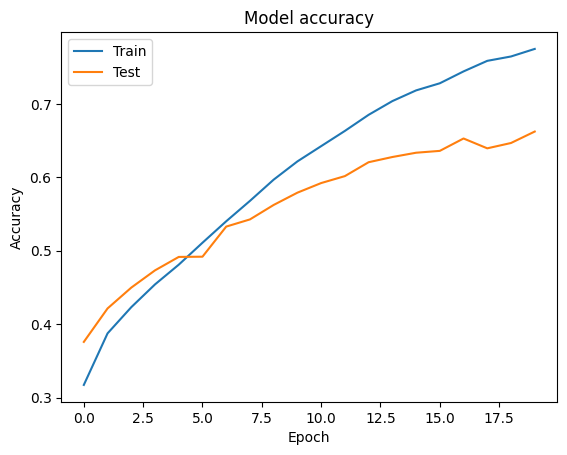

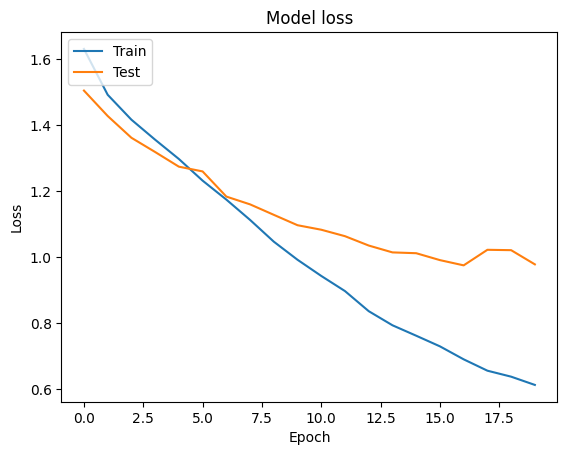

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

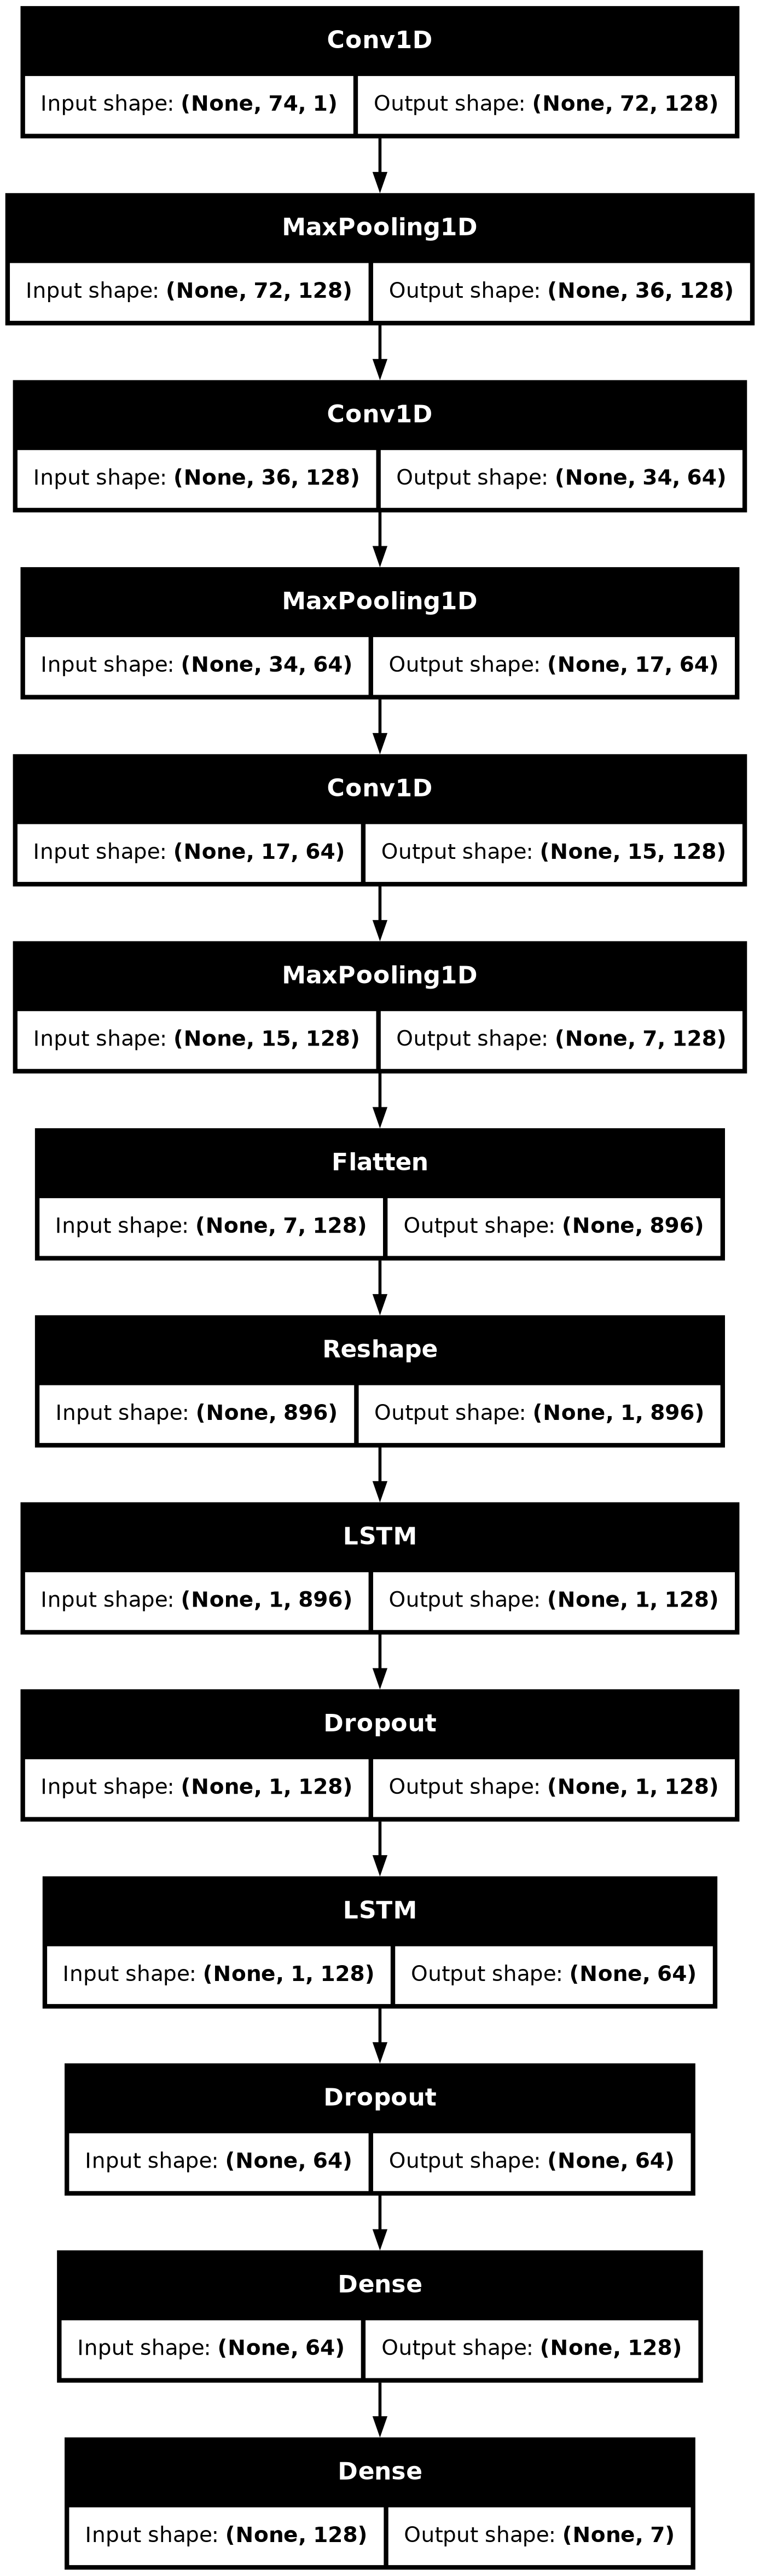

In [47]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model2, to_file='model2_architecture.png', show_shapes=True)

199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


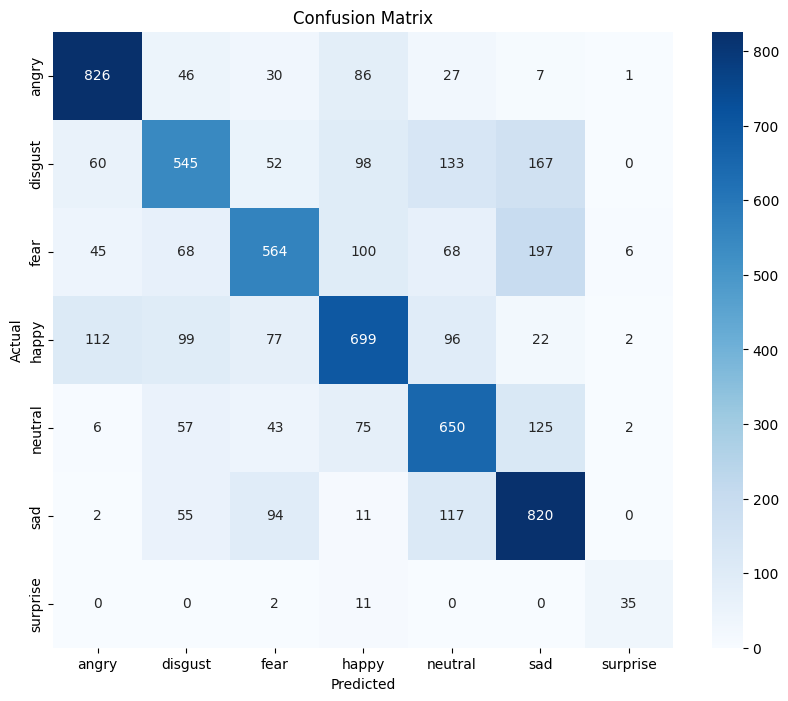

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict probabilities for each class
y_pred_probs = model2.predict(x_test_pca_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
import tensorflow as tf

print(tf.__version__)

2.16.1


# Load Model

In [50]:
import joblib
from keras.models import load_model
import pandas as pd
import warnings

# Suppress the warning
warnings.filterwarnings('ignore', message='Compiled the loaded model, but the compiled metrics have yet to be built.')

# Load features (if needed)
features = pd.read_csv('/kaggle/working/features.csv')

# Load label encoder
label_encoder = joblib.load('/kaggle/input/emotion-detection-model-output/label_encoder.pkl')

# Load PCA transformer (if needed)
pca_transformer = joblib.load('/kaggle/input/emotion-detection-model-output/pca_transformer.pkl')

# Load speech recognition model
emotion_detection_model = load_model('/kaggle/input/emotion-detection-model-output/speech_recognition_model.h5')


In [51]:
emotion_detection_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │       207,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,641 (1.49 MB)

 Trainable params: 389,639 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# To do a prediction, please use google colab

In [52]:
from google.colab import files

# Upload files
uploaded = files.upload()

# Get file paths and names
file_paths = list(uploaded.keys())

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
def extract_features_from_file(file_path, sample_rate=44100):
    # Load audio file
    data, sample_rate = librosa.load(file_path, sr=sample_rate, duration=2.5, offset=0.6)

    # Extract features
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sample_rate).T, axis=0)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)

    # Stack all features horizontally
    features = np.hstack([zcr, chroma_stft, mfcc, rms, mel])

    # Reshape to match expected input shape (None, n_features, 1) for CNN or (None, n_features) for other models
    features = np.expand_dims(features, axis=0)  # Add batch dimension
    features = np.expand_dims(features, axis=-1)  # Add channel dimension if needed

    return features

def recognize_speech_and_emotion(file_path):
    # Extract features
    features = extract_features_from_file(file_path)

    # Perform emotion detection
    predicted_emotion = emotion_detection_model.predict(features)

    # Assuming your model directly predicts emotion labels (e.g., 'angry', 'happy', etc.)
    detected_emotion_index = np.argmax(predicted_emotion)  # Assuming single prediction, use argmax to get index

    return detected_emotion_index  # Return detected emotion index

# Example function to map emotion index to labels (modify based on your label mapping)
def map_emotion_to_label(emotion_index):
    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    return emotion_labels[emotion_index]


In [ ]:
for file_path in file_paths:
    # Recognize speech and detect emotion
    detected_emotion_index = recognize_speech_and_emotion(file_path)
    detected_emotion_label = map_emotion_to_label(detected_emotion_index)

    # Print results
    print(f"File: {file_path}")
    print(f"Detected Emotion: {detected_emotion_label}")
    print()
